In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/50_Startups.csv')
print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [2]:
#print(df.info())

le_state=LabelEncoder()
df['State']=le_state.fit_transform(df['State'])

X=df[['R&D Spend','Administration','Marketing Spend','State']]
y=df['Profit']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

print("Mean Square Error:",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))


Mean Square Error: 31317221.573084574
R2 Score: 0.9836258796010011


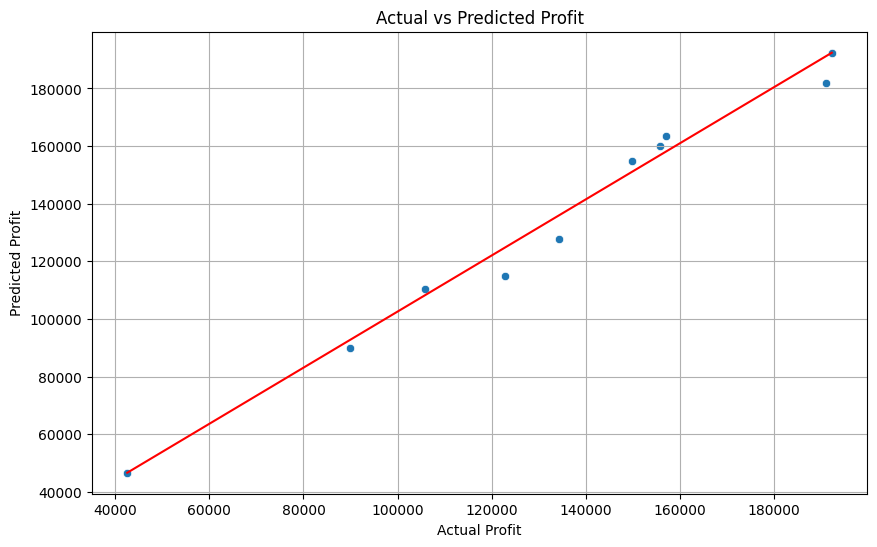

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],color='red')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.grid()
plt.show()